# **Predicting Diabetes Mellitus With Machine Learning Techniques**

  ## Importing necessary libraries

In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Lets start by reading the Diabetes Data

In [5]:
diabetes = pd.read_csv("diabetes.csv")

In [6]:
diabetes

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [7]:
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [8]:
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [9]:
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [10]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
diabetes.shape

(768, 9)

In [12]:
diabetes.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

## Check if our Dataset have any Zero Values

In [13]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
check=diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
check.isin([0]).any().any()

True

In [15]:
check=check.replace(0,np.nan)
check.head()

Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0    148.0           72.0           35.0      NaN  33.6   
1     85.0           66.0           29.0      NaN  26.6   
2    183.0           64.0            NaN      NaN  23.3   
3     89.0           66.0           23.0     94.0  28.1   
4    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [16]:
check.isnull()

Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0      False          False          False     True  False   
1      False          False          False     True  False   
2      False          False           True     True  False   
3      False          False          False    False  False   
4      False          False          False    False  False   
..       ...            ...            ...      ...    ...   
763    False          False          False    False  False   
764    False          False          False     True  False   
765    False          False          False    False  False   
766    False          False           True     True  False   
767    False          False          False     True  False   

     DiabetesPedigreeFunction    Age  
0                       False  False  
1                       False  False  
2                       False  False  
3                       False  False  
4                       False  False  
..                        ...    ...  
763                     False  False  
764                     False  False  
765                     False  False  
766                     False  False  
767                     False  False  

[768 rows x 7 columns]

In [17]:
## 1 make the list of features which has missing values
features_with_na=[features for features in check.columns if check[features].isnull().sum()>1]
## 2 print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(check[feature].isnull().mean(), 4),  ' % missing values')

Glucose 0.0065  % missing values
BloodPressure 0.0456  % missing values
SkinThickness 0.2956  % missing values
Insulin 0.487  % missing values
BMI 0.0143  % missing values


<Axes: >

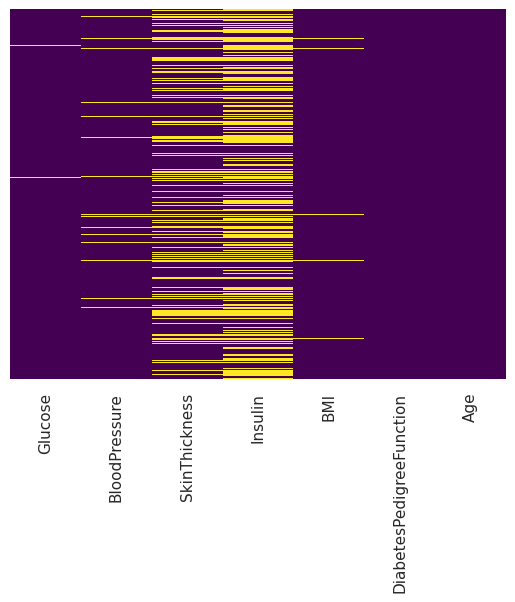

In [18]:
sns.heatmap(check.isnull() , yticklabels=False , cbar=False , cmap='viridis')

In [ ]:
# proportion of diabetes patients (about 35% having diabetes)
diabetes.Outcome.value_counts()[1] / diabetes.Outcome.count()

0.3489583333333333

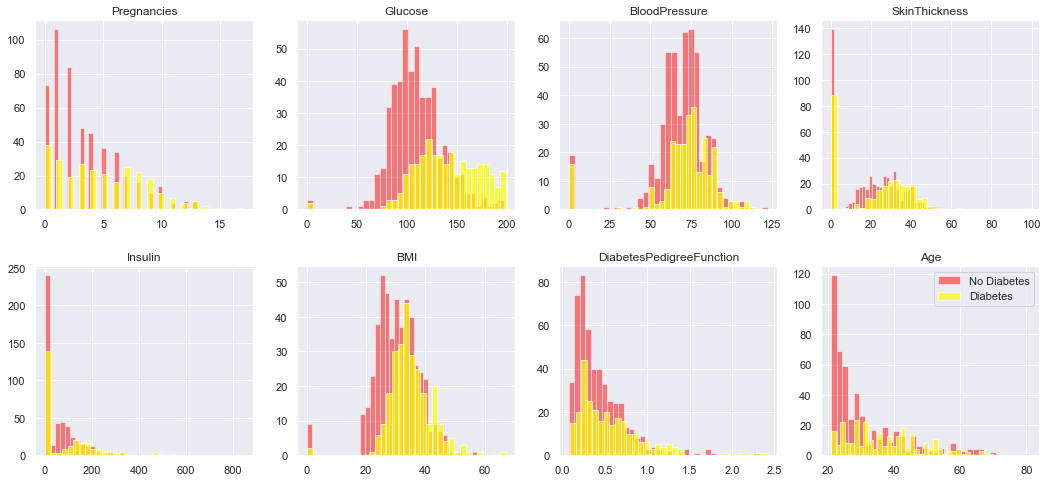

In [ ]:
# To analyse feature-outcome distribution in visualisation
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS

#     diabetes[feature].hist(bins=35, color='green', alpha=0.5, ax=ax[row, col]).set_title(feature)  #show all, comment off below 2 lines
    diabetes[diabetes.Outcome==0][feature].hist(bins=35, color='red', alpha=0.5, ax=ax[row, col]).set_title(feature)
    diabetes[diabetes.Outcome==1][feature].hist(bins=35, color='yellow', alpha=0.7, ax=ax[row, col])

plt.legend(['No Diabetes', 'Diabetes'])
fig.subplots_adjust(hspace=0.3)

0    500
1    268
Name: Outcome, dtype: int64


Text(0.5, 1.0, 'Diabetes Outcome')

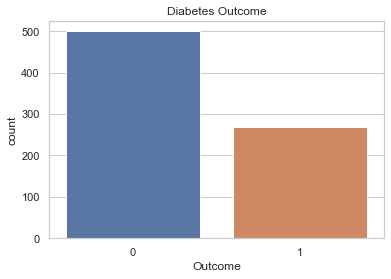

In [ ]:
sns.set_style('whitegrid')
print(diabetes.Outcome.value_counts())
sns.countplot('Outcome',data=diabetes).set_title('Diabetes Outcome')

In [25]:
list_diabetes=[268,500]
list_labels=['Diabetic','Healthy']


([<matplotlib.patches.Wedge at 0x7b261765b550>,
 [Text(1.0051884653130878, 1.9569353972989298, 'Diabetic'),
  Text(-1.0051882820915679, -1.9569354914114576, 'Healthy')],
 [Text(0.5482846174435024, 1.067419307617598, '34.9%'),
  Text(-0.5482845175044915, -1.067419358951704, '65.1%')])

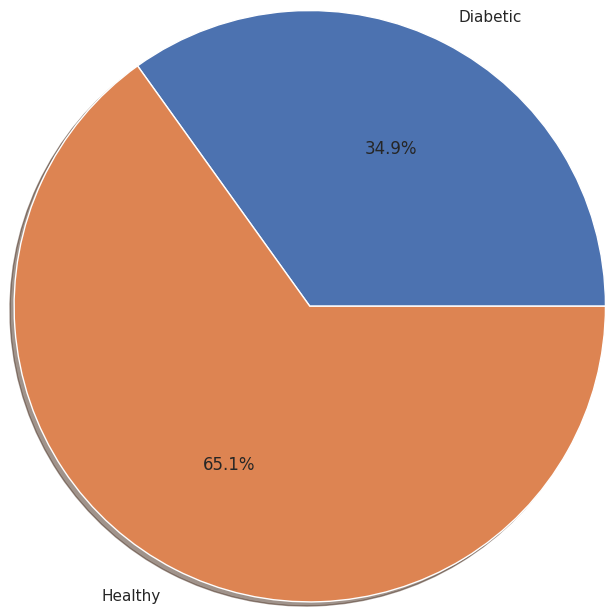

In [26]:
plt.axis('equal')
plt.pie(list_diabetes,labels=list_labels,radius=2,autopct="%0.1f%%",shadow=True)

In [27]:
def plot_prob_density(diabetes_Glucose,diabetes_BloodPressure):
    plt.figure(figsize = (10, 7))

    unit = 1.5
    x = np.linspace(Glucose.min() - unit, Glucose.max() + unit, 1000)[:, np.newaxis]


    # Plot the data using a normalized histogram
    plt.hist(df_lunch, bins=10, density=True, label='Glucose', color='orange', alpha=0.2)
    plt.hist(diabetes_BloodPressure, bins=10, density=True, label='BloodPressure', color='navy', alpha=0.2)

    # Do kernel density estimation
    kd_Glucose = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(df_lunch)
    kd_BloodPressure = KernelDensity(kernel='gaussian', bandwidth=0.5).fit(df_lunch)



    # Plot the estimated densty
    kd_vals_Glucose = np.exp(kd_Glucose.score_samples(x))
    kd_vals_BloodPressure = np.exp(kd_BloodPressure.score_samples(x))


    plt.plot(x, kd_vals_Glucose, color='orange')
    plt.plot(x, kd_vals_Glucose, color='navy')


    plt.axvline(x=x_start,color='red',linestyle='dashed')
    plt.axvline(x=x_end,color='red',linestyle='dashed')


    # Show the plots
    plt.xlabel(field, fontsize=15)
    plt.ylabel('Probability Density', fontsize=15)
    plt.legend(fontsize=15)
    plt.show()
    gc.collect()
    return kd_Glucose

In [28]:
def get_probability(start_value, end_value, eval_points, kd):

    # Number of evaluation points
    N = eval_points
    step = (end_value - start_value) / (N - 1)  # Step size

    x = np.linspace(start_value, end_value, N)[:, np.newaxis]  # Generate values in the range
    kd_vals = np.exp(kd.score_samples(x))  # Get PDF values for each x
    probability = np.sum(kd_vals * step)  # Approximate the integral of the PDF
    return probability.round(4)

## Univariate Analysis


In [30]:
diabetic=diabetes.loc[diabetes['Outcome']==1]
non_diabetic=diabetes.loc[diabetes['Outcome']==0]

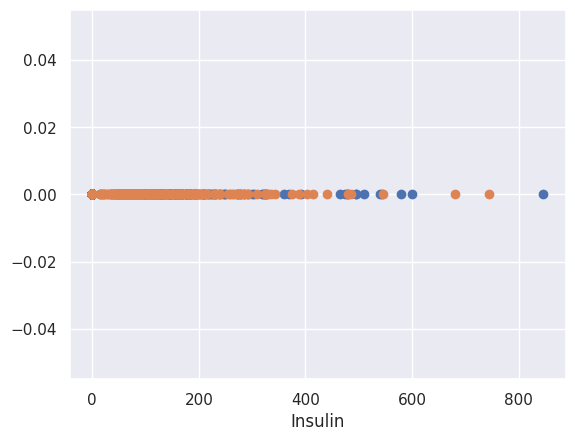

In [31]:
plt.plot(diabetic['Insulin'],np.zeros_like(diabetic['Insulin']),'o')
plt.plot(non_diabetic['Insulin'],np.zeros_like(non_diabetic['Insulin']),'o')
plt.xlabel('Insulin')
plt.show()


## Bivariate Analysis

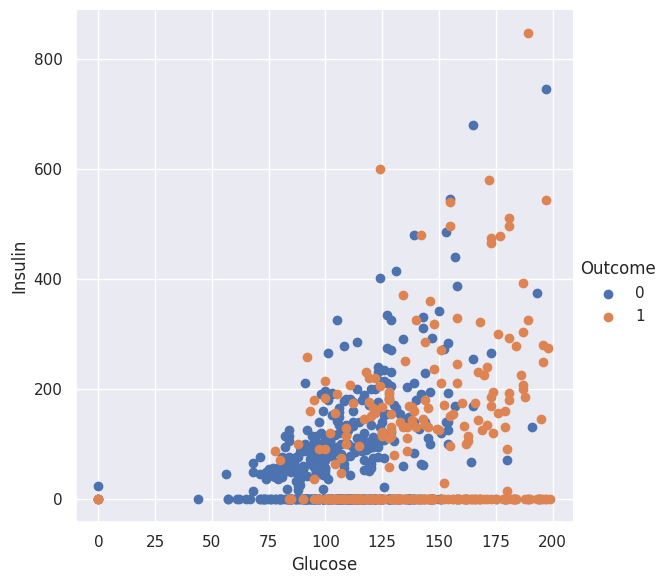

In [32]:
sns.FacetGrid(diabetes,hue='Outcome',height=6).map(plt.scatter,'Glucose','Insulin').add_legend()
plt.show()

### Multivariate Analysis

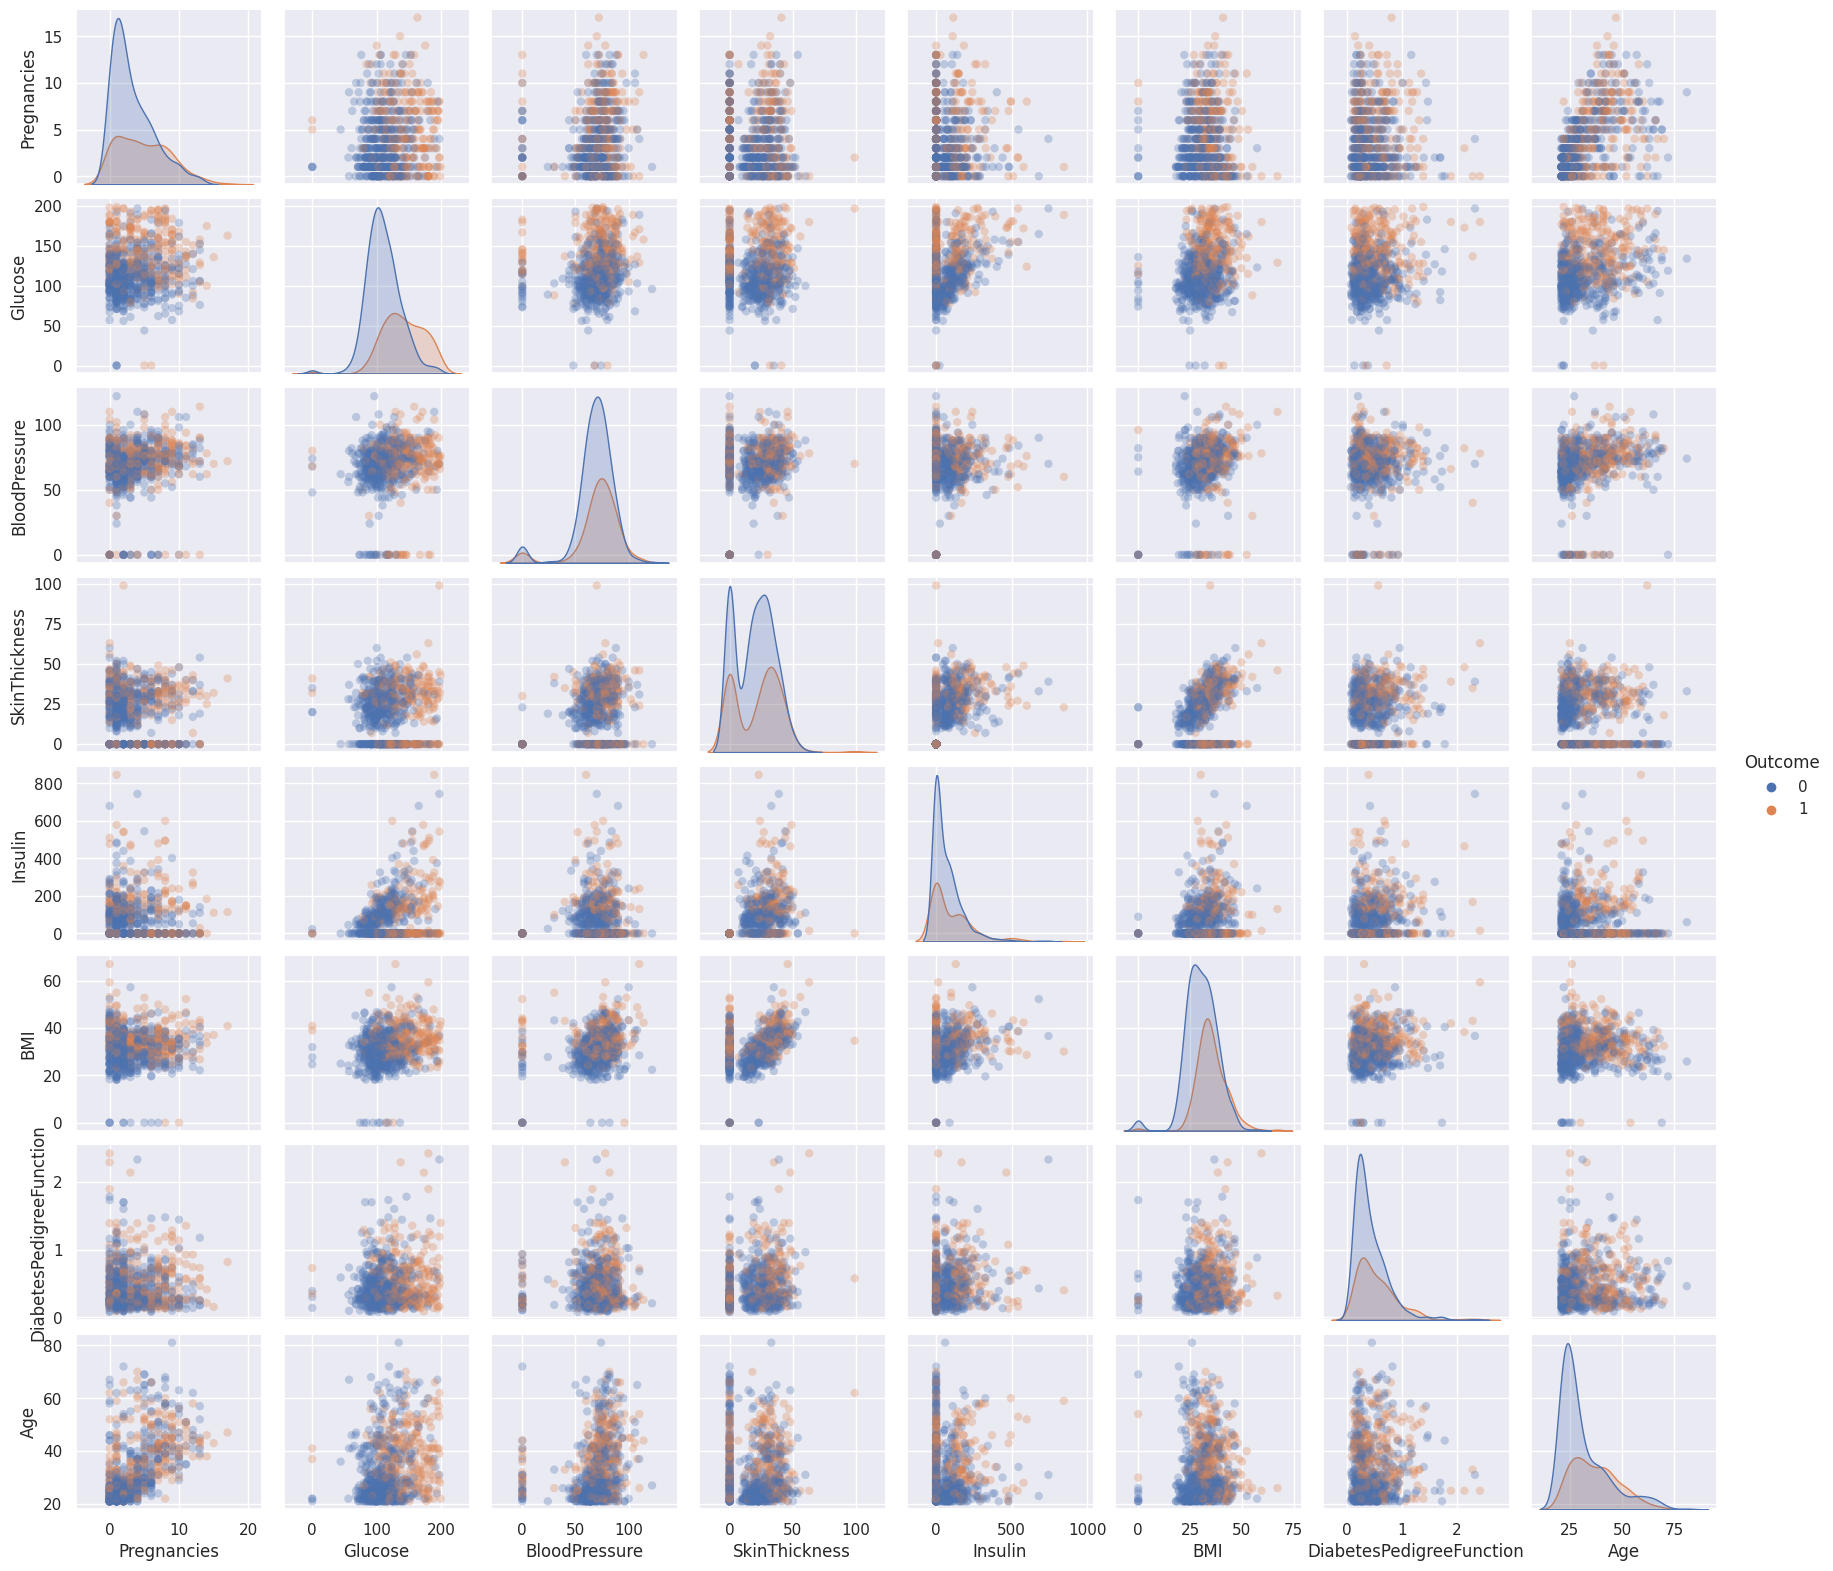

In [33]:
# to visualise pair plot
sns.pairplot(diabetes, hue='Outcome', plot_kws=dict(alpha=.3, edgecolor='none'), height=2, aspect=1.1)
plt.show()


## Correlation Matrix
A correlation matrix is a table showing correlation coefficients between sets of variables.



In [34]:
#Pearson Correlation Cofficient
diabetes.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

In [35]:
mask = np.zeros_like(diabetes.corr())
traingle_indices=np.triu_indices_from(mask)
mask[traingle_indices]=True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1.]])

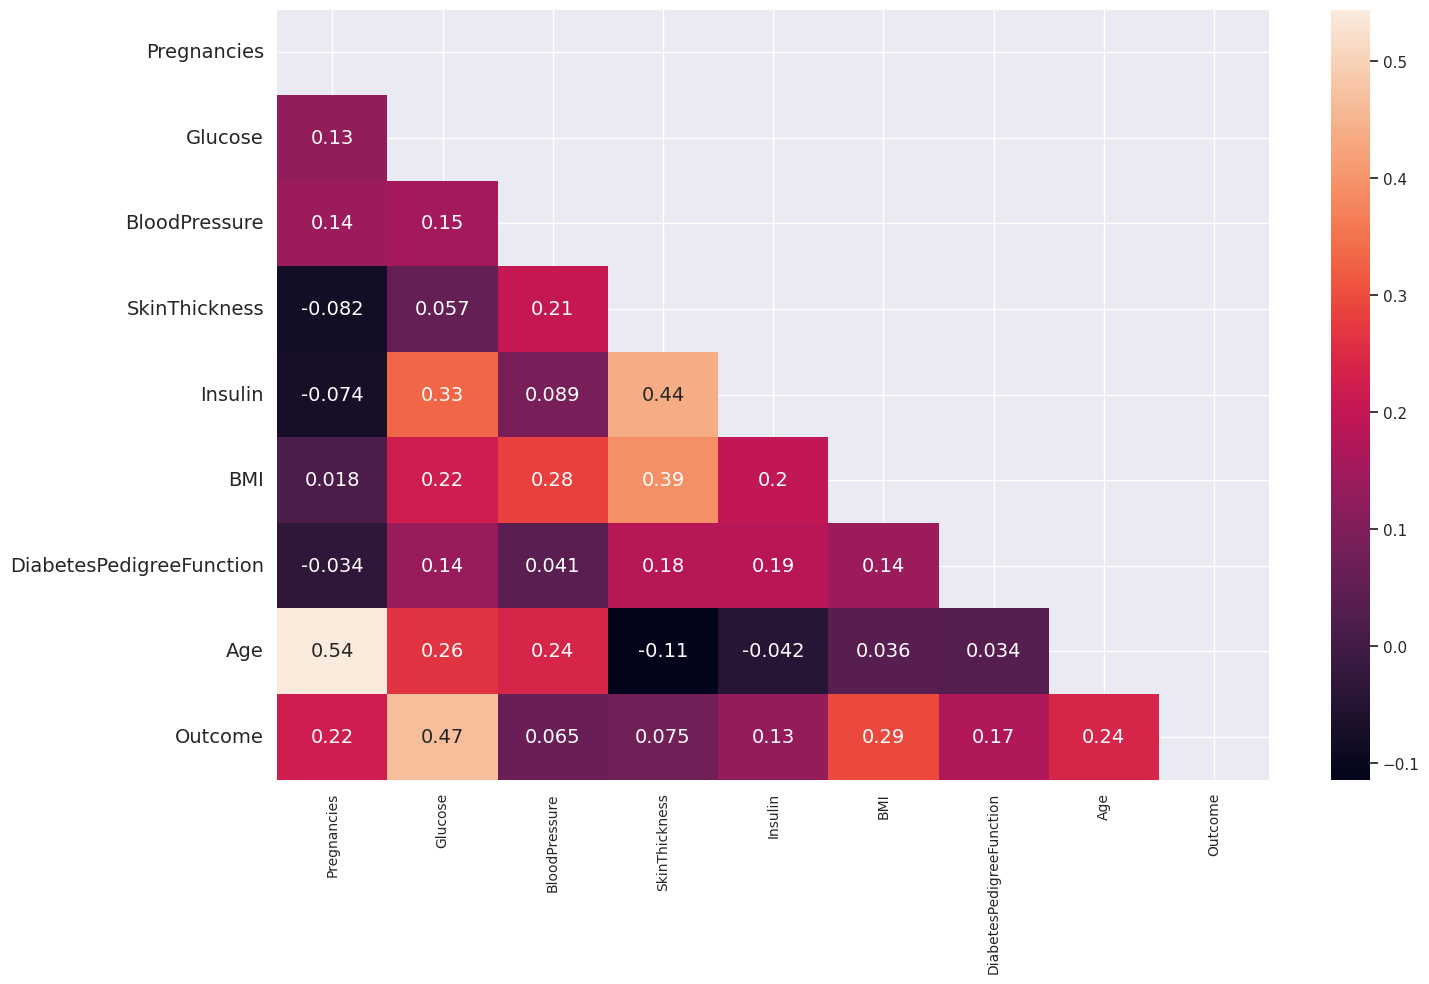

In [36]:
plt.figure(figsize=(16,10))
sns.heatmap(diabetes.corr(),mask=mask, annot=True, annot_kws={"size" : 14})
sns.set_style('white')
plt.xticks(fontsize=10)
plt.yticks(fontsize=14)
plt.show()

## Replacing Missing Values Inside Data

In [37]:
diabetes['Glucose'].mean()

120.89453125

In [38]:
diabetes['Glucose'].median()

117.0

In [39]:
diabetes['Glucose'] = diabetes['Glucose'].replace(0, diabetes['Glucose'].median())
diabetes['BloodPressure'] = diabetes['BloodPressure'].replace(0, diabetes['BloodPressure'].median())
diabetes['SkinThickness'] = diabetes['SkinThickness'].replace(0, diabetes['SkinThickness'].median())
diabetes['Insulin'] = diabetes['Insulin'].replace(0, diabetes['Insulin'].median())
diabetes['BMI'] = diabetes['BMI'].replace(0, diabetes['BMI'].median())
diabetes

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35     30.5  33.6   
1              1       85             66             29     30.5  26.6   
2              8      183             64             23     30.5  23.3   
3              1       89             66             23     94.0  28.1   
4              0      137             40             35    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48    180.0  32.9   
764            2      122             70             27     30.5  36.8   
765            5      121             72             23    112.0  26.2   
766            1      126             60             23     30.5  30.1   
767            1       93             70             31     30.5  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

## Visualization of Data After Removing Null Values

<Axes: >

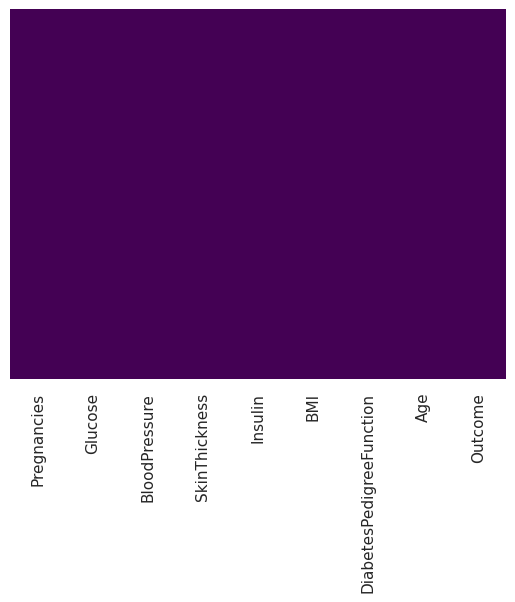

In [40]:
sns.heatmap(diabetes.isnull() , yticklabels=False , cbar=False , cmap='viridis')

## Removing Outliers from the data

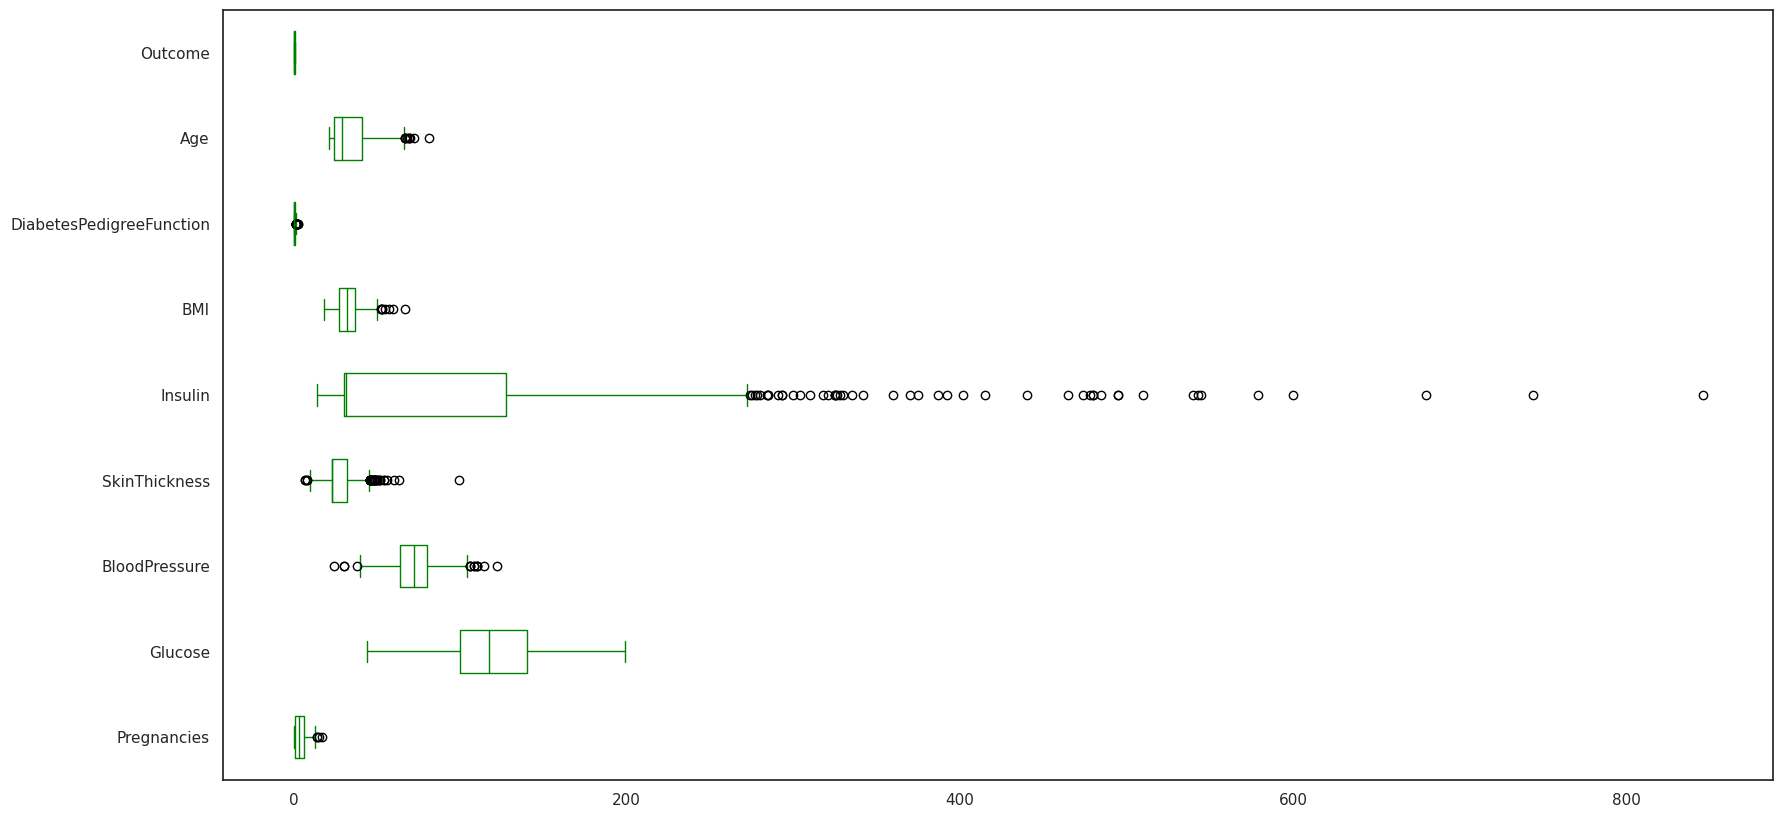

In [41]:
diabetes.plot(kind='box',figsize=(20,10),color='Green',vert=False)
plt.show()

In [42]:
SkinThickness_Outliers = diabetes['SkinThickness'].to_list()
Insulin_outliers = diabetes['Insulin'].to_list()

In [43]:
outliers=[]
def detect_outliers(data):

    threshold=3
    mean = np.mean(data)
    std =np.std(data)


    for i in data:
        z_score= (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [44]:
outlier_pt=detect_outliers(SkinThickness_Outliers)
outlier_pt

[60, 56, 63, 99]

In [45]:
outlier_pt=detect_outliers(Insulin_outliers)
outlier_pt

[60,
 56,
 63,
 99,
 543.0,
 846.0,
 495.0,
 485.0,
 495.0,
 478.0,
 744.0,
 680.0,
 545.0,
 465.0,
 415.0,
 579.0,
 474.0,
 480.0,
 600.0,
 440.0,
 540.0,
 480.0,
 510.0]

In [46]:
diabetes=diabetes[diabetes['SkinThickness']<80]
diabetes=diabetes[diabetes['Insulin']<=600]
print(diabetes.shape)

(764, 9)


## Data Modelling
We will work with six classification Algorithms.
1. Decision trees
2. SVM
3. Random Forest
3. Neural Network

## Decision Trees.

In [76]:
# feature selection
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x = diabetes[feature_cols]
y = diabetes.Outcome

In [77]:
# split data
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [78]:
X_train.shape

(534, 7)

In [79]:
Y_train.shape

(534,)

In [80]:
X_test.shape

(230, 7)

In [81]:
Y_test.shape

(230,)

In [82]:
# build model
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier = classifier.fit(X_train, Y_train)


In [83]:
y_pred = classifier.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 1
 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1
 0 0 1 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1
 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0
 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0]


Text(0.5, 19.049999999999997, 'Predicted label')

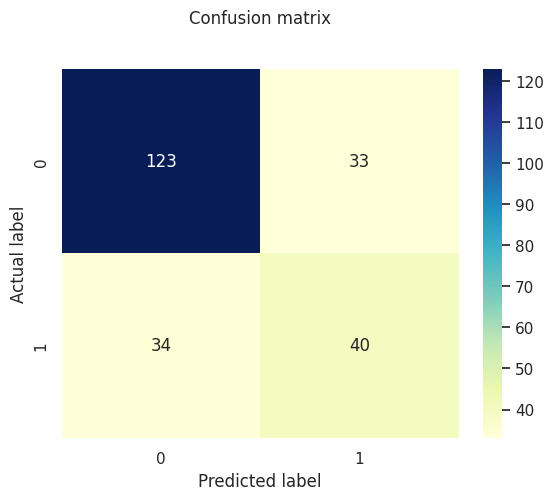

In [84]:
y_pred = classifier.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [63]:
# accuracy
print("Accuracy:", metrics.accuracy_score(Y_test,y_pred))

Accuracy: 0.7260869565217392


In [86]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79       156
           1       0.55      0.54      0.54        74

    accuracy                           0.71       230
   macro avg       0.67      0.66      0.67       230
weighted avg       0.71      0.71      0.71       230



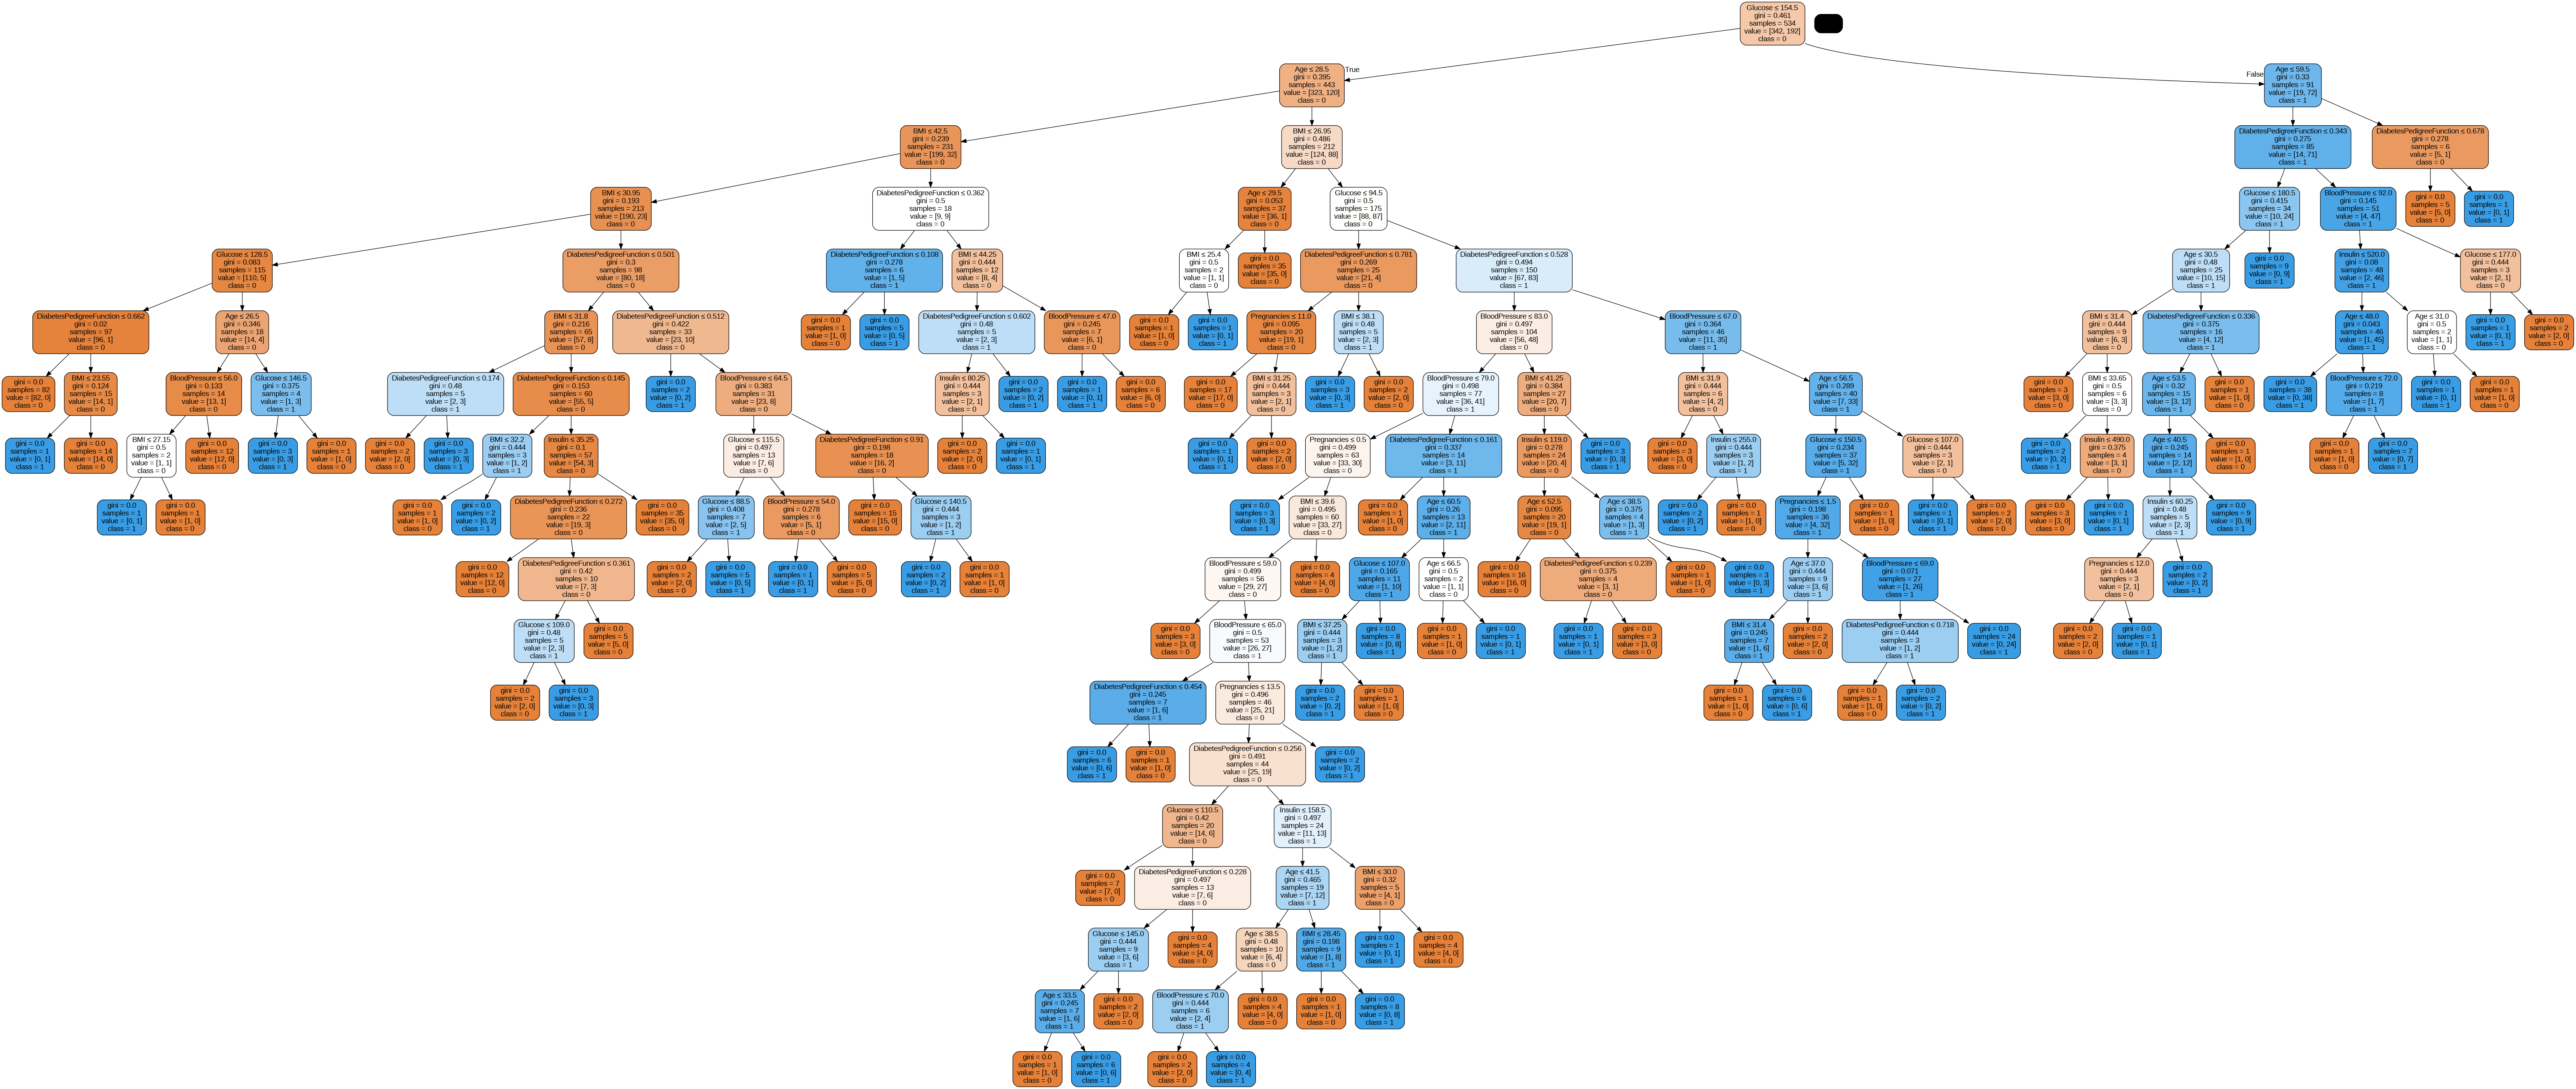

In [88]:
import io
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from IPython.display import Image
%matplotlib inline

dot_data = io.StringIO()
export_graphviz(classifier, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())


## Support Vector Machine

## SVM with RBF kernal

In [97]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)


In [98]:
from sklearn.svm import SVC
model=SVC(kernel='rbf')
model.fit(X_train,Y_train)

SVC()

In [99]:
y_pred=model.predict(X_test)

In [101]:
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8


Text(0.5, 19.049999999999997, 'Predicted label')

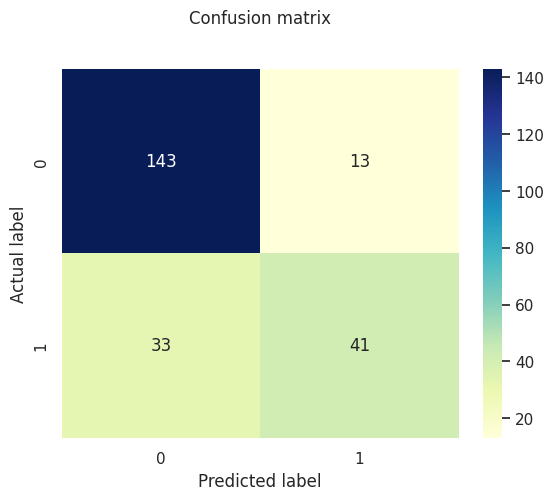

In [102]:
y_pred = model.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [103]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       156
           1       0.76      0.55      0.64        74

    accuracy                           0.80       230
   macro avg       0.79      0.74      0.75       230
weighted avg       0.80      0.80      0.79       230



AUC: 0.74


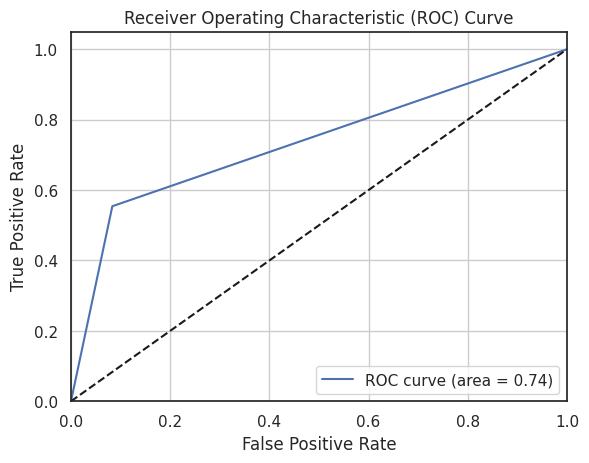

In [106]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Your code here
fpr, tpr, _ = roc_curve(Y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('AUC: %0.2f' % roc_auc)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [107]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,y_pred)

0.7353603603603603

## SVM with Linear Kernel

In [108]:
model=SVC(kernel='linear')
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [109]:
y_pred=model.predict(X_test)

In [110]:
accuracy_score(Y_test,y_pred)

0.8043478260869565

Text(0.5, 19.049999999999997, 'Predicted label')

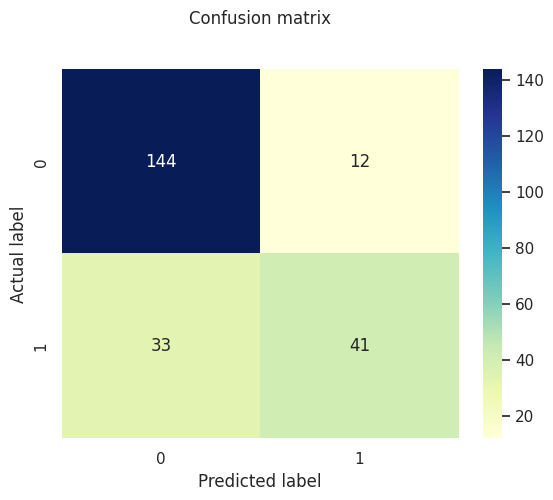

In [111]:
y_pred = model.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [112]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       156
           1       0.77      0.55      0.65        74

    accuracy                           0.80       230
   macro avg       0.79      0.74      0.76       230
weighted avg       0.80      0.80      0.79       230



ROC AUC: 0.74


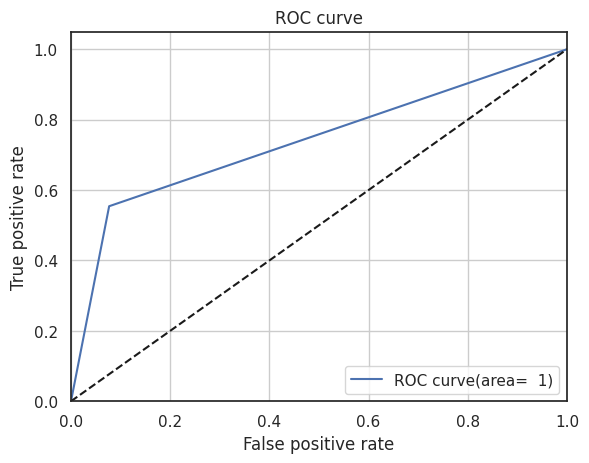

In [113]:
fpr,tpr,_=roc_curve(Y_test,y_pred)
#calculate AUC
roc_auc=auc(fpr,tpr)
print('ROC AUC: %0.2f' % roc_auc)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

## Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,Y_train)


RandomForestClassifier()

In [116]:
from sklearn.metrics import confusion_matrix

Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_pred)


Text(0.5, 19.049999999999997, 'Predicted label')

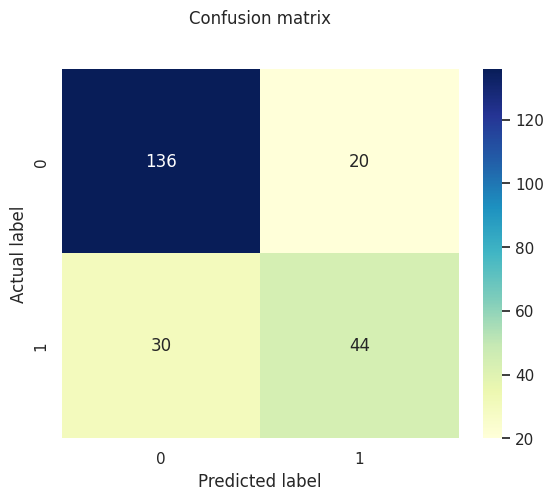

In [117]:

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(Y_test, Y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [118]:
accuracy_score(Y_test,Y_pred)

0.782608695652174

In [119]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       156
           1       0.69      0.59      0.64        74

    accuracy                           0.78       230
   macro avg       0.75      0.73      0.74       230
weighted avg       0.78      0.78      0.78       230



ROC AUC: 0.73


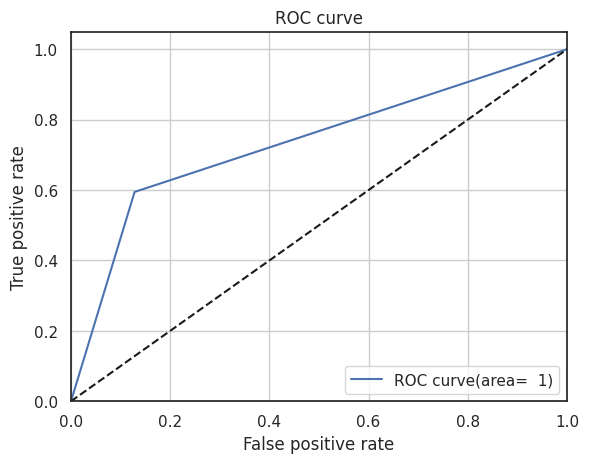

In [120]:
fpr,tpr,_=roc_curve(Y_test,Y_pred)
#calculate AUC
roc_auc=auc(fpr,tpr)
print('ROC AUC: %0.2f' % roc_auc)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [121]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,y_pred)

0.7385654885654885

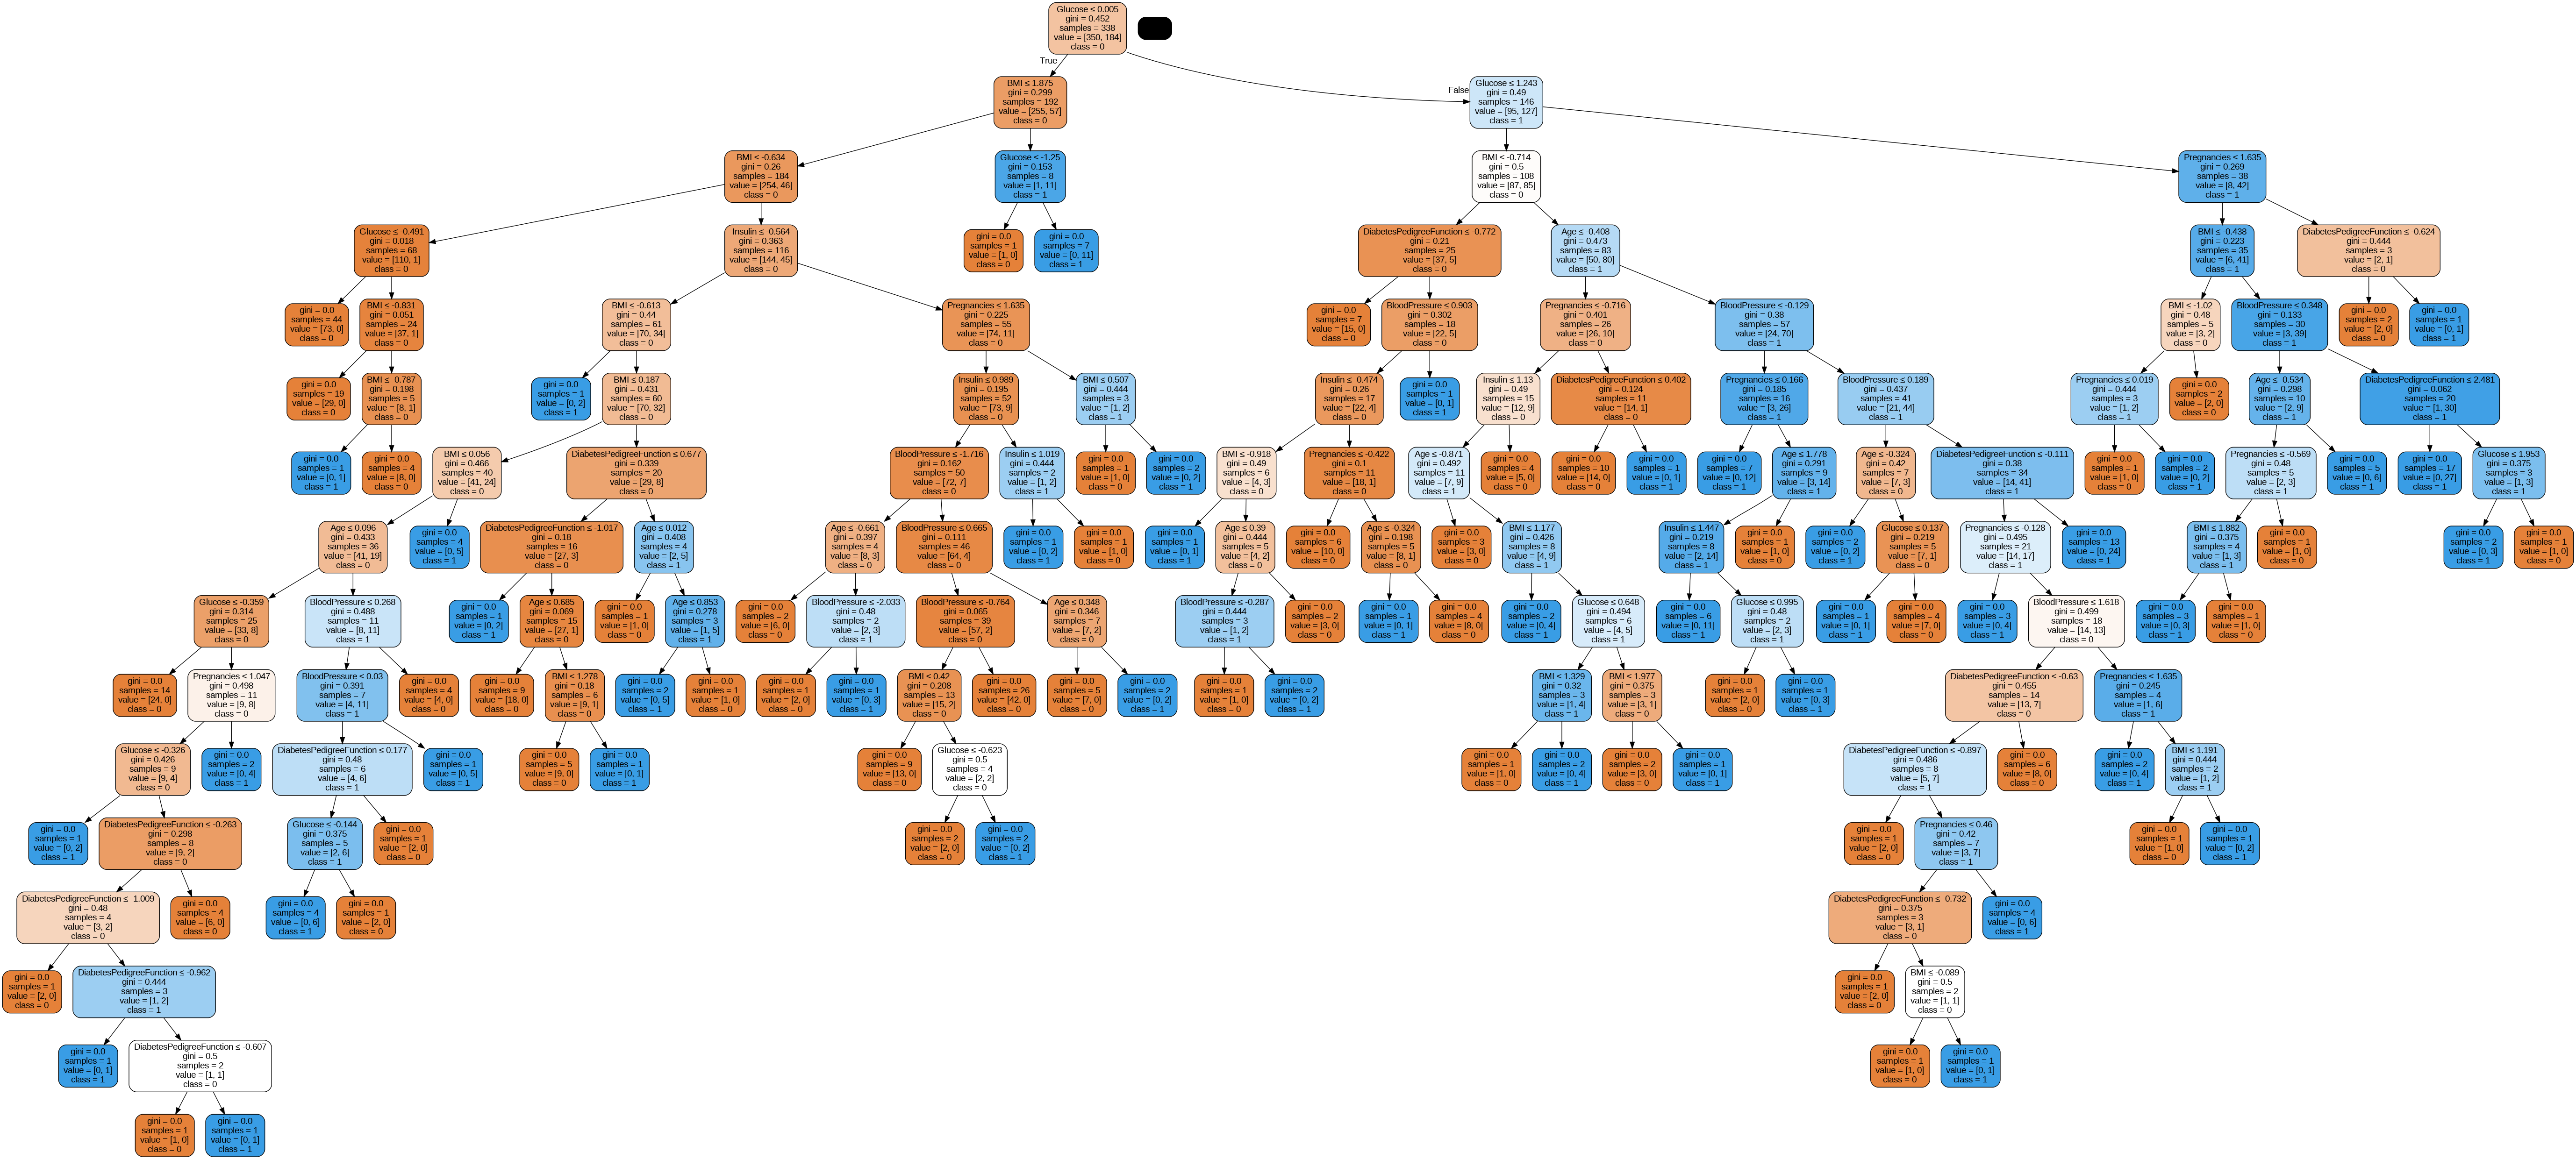

In [127]:
import io
import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

# Select one of the decision trees from the Random Forest (e.g., the first tree)
estimator = classifier.estimators_[0]  # You can choose any tree from the forest

dot_data = io.StringIO()
export_graphviz(estimator, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('random_forest_tree.png')
Image(graph.create_png())


# NEURAL NETWORK

Epoch 1/100
20/20 [==============================] - 1s 11ms/step - loss: 0.6234 - accuracy: 0.7054 - val_loss: 0.5467 - val_accuracy: 0.7843
Epoch 2/100
20/20 [==============================] - 0s 4ms/step - loss: 0.5399 - accuracy: 0.7430 - val_loss: 0.4867 - val_accuracy: 0.7974
Epoch 3/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4979 - accuracy: 0.7496 - val_loss: 0.4540 - val_accuracy: 0.8039
Epoch 4/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4778 - accuracy: 0.7627 - val_loss: 0.4418 - val_accuracy: 0.8170
Epoch 5/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4723 - accuracy: 0.7610 - val_loss: 0.4337 - val_accuracy: 0.8039
Epoch 6/100
20/20 [==============================] - 0s 4ms/step - loss: 0.4599 - accuracy: 0.7692 - val_loss: 0.4311 - val_accuracy: 0.8235
Epoch 7/100
20/20 [==============================] - 0s 5ms/step - loss: 0.4549 - accuracy: 0.7643 - val_loss: 0.4316 - val_accuracy: 0.8235
Epoch 8/100


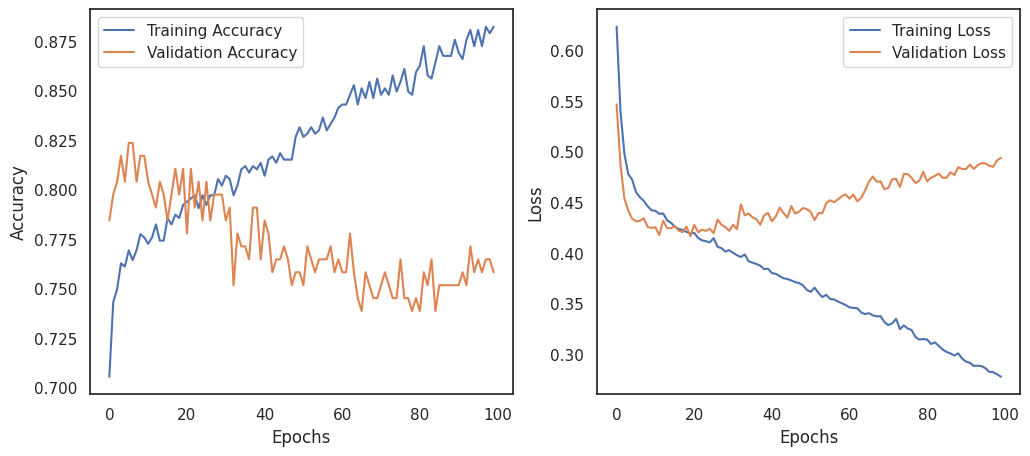

In [128]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt



# Replace missing or unrealistic values
diabetes['Glucose'] = diabetes['Glucose'].replace(0, diabetes['Glucose'].median())
diabetes['BloodPressure'] = diabetes['BloodPressure'].replace(0, diabetes['BloodPressure'].median())
diabetes['SkinThickness'] = diabetes['SkinThickness'].replace(0, diabetes['SkinThickness'].median())
diabetes['Insulin'] = diabetes['Insulin'].replace(0, diabetes['Insulin'].median())
diabetes['BMI'] = diabetes['BMI'].replace(0, diabetes['BMI'].median())

# Split the dataset into features (X) and target (y)
X = diabetes.drop(columns=['Outcome'])
y = diabetes['Outcome']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build a simple neural network model
model = keras.Sequential([
    keras.layers.Input(shape=(X_train.shape[1],)),  # Input layer
    keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    keras.layers.Dense(32, activation='relu'),  # Hidden layer with 32 neurons and ReLU activation
    keras.layers.Dense(1, activation='sigmoid')  # Output layer with a sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model and keep track of training history
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Make predictions
predictions = model.predict(X_test)

# Plot the training and testing accuracy over epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot the training and testing loss over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


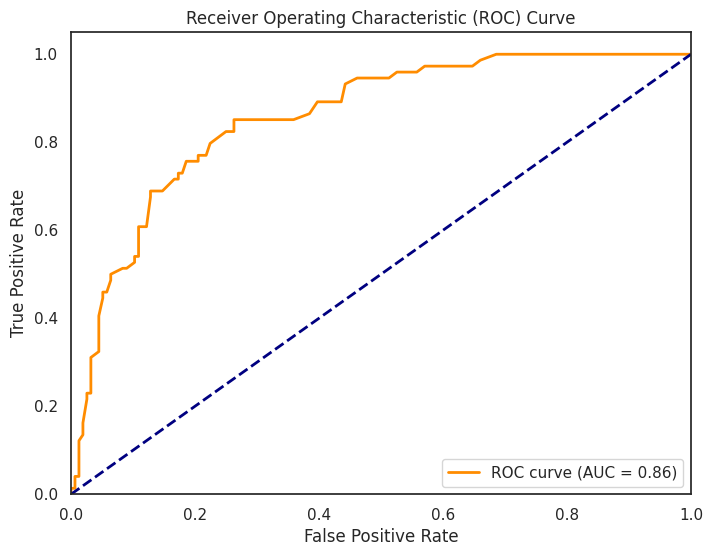

In [126]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()